# Study the effect of different values of dropout

## Summary

In this notebook, I have studied the effect of different values of dropout. I noticed that choosing low value of dropout doesn't solve the problem of overfitting and choosing a very high value, We lost too much information.

In [1]:
import keras

Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import np_utils
np.random.seed(1671)

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [5]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [52]:
accuracies=[]

#### Dropout = 0.1

In [27]:
model = Sequential()
model.add(Dense(128, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_22 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_23 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1290      
__________

In [28]:
OPTIMIZER = Adam() #optimizer

model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
history = model.fit(X_train, Y_train,batch_size=128, epochs=20,verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 4s - loss: 0.3968 - acc: 0.8839 - val_loss: 0.1634 - val_acc: 0.9525
Epoch 2/20
48000/48000 [==============================] - 3s - loss: 0.1619 - acc: 0.9522 - val_loss: 0.1224 - val_acc: 0.9629
Epoch 3/20
48000/48000 [==============================] - 3s - loss: 0.1170 - acc: 0.9651 - val_loss: 0.1086 - val_acc: 0.9668
Epoch 4/20
48000/48000 [==============================] - 3s - loss: 0.0950 - acc: 0.9714 - val_loss: 0.0893 - val_acc: 0.9722
Epoch 5/20
48000/48000 [==============================] - 3s - loss: 0.0754 - acc: 0.9770 - val_loss: 0.0876 - val_acc: 0.9735
Epoch 6/20
48000/48000 [==============================] - 3s - loss: 0.0676 - acc: 0.9793 - val_loss: 0.0889 - val_acc: 0.9727
Epoch 7/20
48000/48000 [==============================] - 3s - loss: 0.0557 - acc: 0.9821 - val_loss: 0.0924 - val_acc: 0.9737
Epoch 8/20
48000/48000 [==============================] - 3s 

In [53]:
# evaluate the network
loss, accuracy = model.evaluate(X_test, Y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))
accuracies.append(accuracy)

 9888/10000 [============================>.] - ETA: 0s
Loss: 0.08, Accuracy: 97.81%


#### Dropout = 0.2

In [39]:
model2 = Sequential()
model2.add(Dense(128, input_shape=(784,)))
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10))
model2.add(Activation('softmax'))
model2.summary()

model2.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
history2 = model2.fit(X_train, Y_train,batch_size=128, epochs=20,verbose=1, validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_37 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_38 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 10)                1290      
__________

In [54]:
# evaluate the network
loss, accuracy = model2.evaluate(X_test, Y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))
accuracies.append(accuracy)

10000/10000 [==============================] - 0s     

Loss: 0.09, Accuracy: 97.72%


#### Dropout = 0.3

In [41]:
model3 = Sequential()
model3.add(Dense(128, input_shape=(784,)))
model3.add(Activation('relu'))
model3.add(Dropout(0.3))
model3.add(Dense(128))
model3.add(Activation('relu'))
model3.add(Dropout(0.3))
model3.add(Dense(10))
model3.add(Activation('softmax'))
model3.summary()

model3.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
history3 = model3.fit(X_train, Y_train,batch_size=128, epochs=20,verbose=1, validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_40 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_41 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 10)                1290      
__________

In [55]:
# evaluate the network
loss, accuracy = model3.evaluate(X_test, Y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))
accuracies.append(accuracy)

 9312/10000 [==========================>...] - ETA: 0s
Loss: 0.08, Accuracy: 97.81%


#### Dropout = 0.4

In [43]:
model4 = Sequential()
model4.add(Dense(128, input_shape=(784,)))
model4.add(Activation('relu'))
model4.add(Dropout(0.4))
model4.add(Dense(128))
model4.add(Activation('relu'))
model4.add(Dropout(0.4))
model4.add(Dense(10))
model4.add(Activation('softmax'))
model4.summary()

model4.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
history4 = model4.fit(X_train, Y_train,batch_size=128, epochs=20,verbose=1, validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_43 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_44 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 10)                1290      
__________

In [56]:
# evaluate the network
loss, accuracy = model4.evaluate(X_test, Y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))
accuracies.append(accuracy)

 9408/10000 [===========================>..] - ETA: 0s
Loss: 0.09, Accuracy: 97.52%


#### Dropout = 0.5

In [45]:
model5 = Sequential()
model5.add(Dense(128, input_shape=(784,)))
model5.add(Activation('relu'))
model5.add(Dropout(0.5))
model5.add(Dense(128))
model5.add(Activation('relu'))
model5.add(Dropout(0.5))
model5.add(Dense(10))
model5.add(Activation('softmax'))
model5.summary()

model5.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
history5 = model5.fit(X_train, Y_train,batch_size=128, epochs=20,verbose=1, validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_46 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_47 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 10)                1290      
__________

In [57]:
# evaluate the network
loss, accuracy = model5.evaluate(X_test, Y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))
accuracies.append(accuracy)

 9056/10000 [==========================>...] - ETA: 0s
Loss: 0.09, Accuracy: 97.12%


#### Dropout = 0.6

In [47]:
model6 = Sequential()
model6.add(Dense(128, input_shape=(784,)))
model6.add(Activation('relu'))
model6.add(Dropout(0.6))
model6.add(Dense(128))
model6.add(Activation('relu'))
model6.add(Dropout(0.6))
model6.add(Dense(10))
model6.add(Activation('softmax'))
model6.summary()

model6.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
history6 = model6.fit(X_train, Y_train,batch_size=128, epochs=20,verbose=1, validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_49 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_50 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 10)                1290      
__________

In [58]:
# evaluate the network
loss, accuracy = model6.evaluate(X_test, Y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))
accuracies.append(accuracy)

 9216/10000 [==========================>...] - ETA: 0s
Loss: 0.12, Accuracy: 96.65%


In [59]:
accuracies

[0.97809999999999997,
 0.97719999999999996,
 0.97809999999999997,
 0.97519999999999996,
 0.97119999999999995,
 0.96650000000000003]

In [60]:
dropouts=[0.1,0.2,0.3,0.4,0.5,0.6]

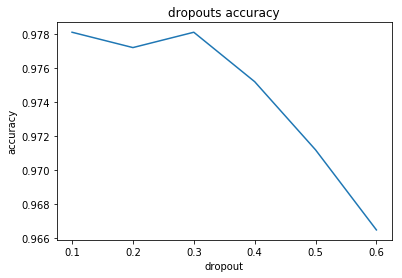

In [61]:
# summarize history for accuracy
plt.plot(dropouts,accuracies)

plt.title('dropouts accuracy')
plt.ylabel('accuracy')
plt.xlabel('dropout')
plt.show()